In [2]:
import os
os.getcwd()

'C:\\Users\\sneha'

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=20)
     

In [4]:
abspath_curr = 'D:/Sign Lang Pred/Curr Folder'

In [5]:
data = "D:/Sign Lang Pred/archive(4)/Gesture Image Data/"

In [6]:
categories = os.listdir(data)
print(categories)
print(len(categories))

['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
37


In [7]:
#pip install opencv-python

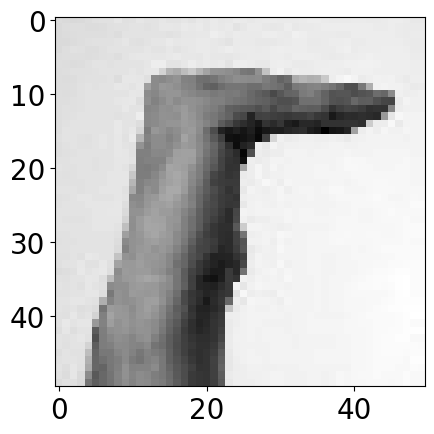

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
for x in categories:
  path = os.path.join(data,x)
  for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
  break  #...and one more!  

In [9]:

training_data = []


In [10]:
for y in categories:
  path = os.path.join(data,y)
  for img in os.listdir(path):
    try:
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(50,50))  # convert to array
        training_data.append([new_array, y])
    except Exception as e:
      pass

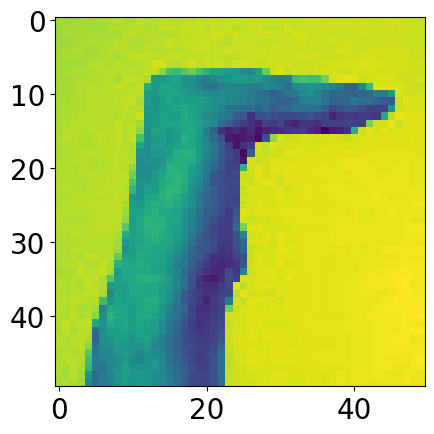

In [11]:
plt.imshow(training_data[0][0])

In [12]:
import random 
random.shuffle(training_data)

In [13]:
training_data[1]

[array([[176, 177, 177, ..., 178, 178, 178],
        [176, 177, 177, ..., 180, 178, 178],
        [176, 176, 177, ..., 180, 179, 179],
        ...,
        [176, 176, 177, ..., 186, 186, 186],
        [176, 176, 177, ..., 184, 186, 185],
        [175, 176, 176, ..., 185, 185, 184]], dtype=uint8),
 'V']

In [14]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)
     

In [15]:
X = np.array(X)
Y = np.array(Y)

In [16]:
transdict = {'-':1,
    '0':2,
    '1':3,
    '2':4,
    '3':5,
    '4':6,
    '5':7,
    '6':8,
    '7':9,
    '8':10,
    '9':11,
    'A':12,
    'B':13,
    'C':14,
    'D':15,
    'E':16,
    'F':17,
    'G':18,
    'H':19,
    'I':20,
    'J':21,
    'K':22,
    'L':23,
    'M':24,
    'N':25,
    'O':26,
    'P':27,
    'Q':28,
    'R':29,
    'S':30,
    'T':31,
    'U':32,
    'V':33,
    'W':34,
    'X':35,
    'Y':36,
    'Z':37,
}
def get_key(value, dictionary):
  for key, val in dictionary.items():
    if value == val:
      return key 
  

In [17]:
transform_Y = [transdict[letter] for letter in Y]

In [18]:
Y = np.array(transform_Y)

In [19]:
# Making it 3D 
X = np.array(X).reshape(-1,50,50,1)
# Normalizing
X = X/255

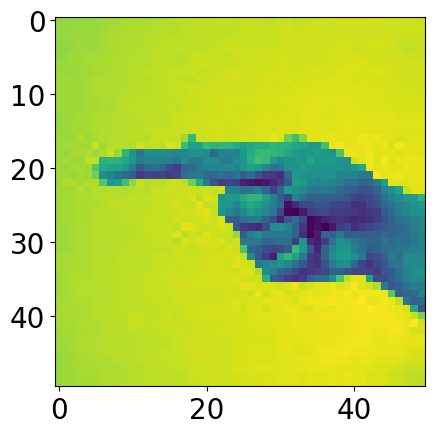

In [20]:
plt.imshow(X[0])

In [21]:
# The magic below allows us to use tensorflow version 2.x

import tensorflow as tf
from tensorflow import keras
     

In [22]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)
     

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.3, random_state = random_seed, stratify=Y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=random_seed, stratify=y_train)

In [24]:
data_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_valid = tf.data.Dataset.from_tensor_slices((X_val, y_val))
data_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [25]:
type(data_train)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [26]:
print(data_train)

<_TensorSliceDataset element_spec=(TensorSpec(shape=(50, 50, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>


In [27]:

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

In [28]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)
     

In [29]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 5, activation='relu',input_shape=(50, 50, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),  
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(38, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 64)                1083456   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 38)                2470      
                                                        

In [30]:
# Compile the model
model.compile(keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model_sign.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=2)

In [32]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
1700/1700 [==============================] - 48s 27ms/step - loss: 1.8705 - accuracy: 0.5004 - val_loss: 0.6826 - val_accuracy: 0.8310 - lr: 1.0000e-04
Epoch 2/5
1700/1700 [==============================] - 42s 25ms/step - loss: 0.6557 - accuracy: 0.8055 - val_loss: 0.3273 - val_accuracy: 0.9189 - lr: 1.0000e-04
Epoch 3/5
1700/1700 [==============================] - 42s 24ms/step - loss: 0.4057 - accuracy: 0.8769 - val_loss: 0.1809 - val_accuracy: 0.9580 - lr: 1.0000e-04
Epoch 4/5
1700/1700 [==============================] - 46s 27ms/step - loss: 0.2835 - accuracy: 0.9128 - val_loss: 0.1195 - val_accuracy: 0.9759 - lr: 1.0000e-04
Epoch 5/5
1700/1700 [==============================] - 42s 25ms/step - loss: 0.2172 - accuracy: 0.9342 - val_loss: 0.0914 - val_accuracy: 0.9810 - lr: 1.0000e-04


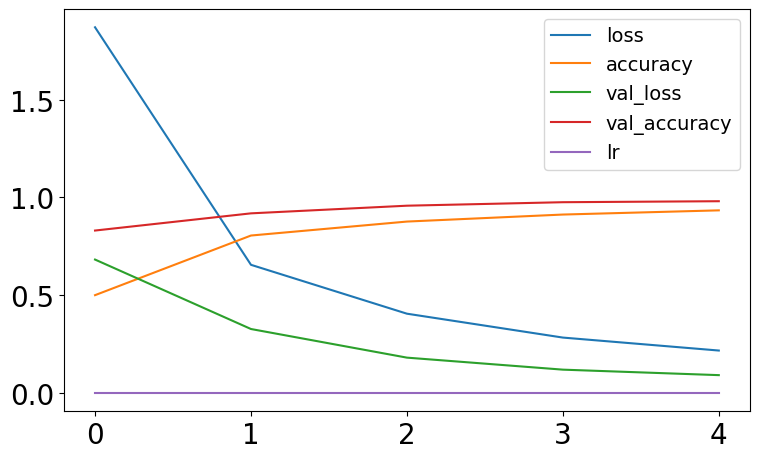

In [38]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.legend()
# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/model/learning_curve_sign.pdf')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(data_test)

In [ ]:
loss*100

In [ ]:
accuracy*100

In [ ]:
from PIL import Image

In [ ]:
img = cv2.imread("D:/Sign Lang Pred/Curr Folder/Pred Img/ImgC.jpg",cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (50, 50))
plt.imshow(img,cmap = 'gray')
# Create a PIL Image object from the image array
image = Image.fromarray(img)

# Save the image as a JPEG file
image.save('output.jpg')
plt.show()

img = np.reshape(img, [-1, 50, 50, 1])
img = img/255
pred= np.argmax(model.predict(img))
print(pred)
pred= get_key(pred,transdict)
print(f'Prediction: {pred}\n Actual: C')

# Voice!!! (^-^)
import gtts  
from playsound import playsound  
t1 = gtts.gTTS(pred)  
t1.save("Pred(1).mp3")   
playsound("Pred(1).mp3")   

# TEXT TO SPEECH

import gtts  
from playsound import playsound  
t1 = gtts.gTTS(pred)  
t1.save("Pred(1).mp3")   
playsound("Pred(1).mp3")  


In [81]:
model.save('final_model_img.h5')


C:\Users\sneha\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
m = keras.models.load_model('D:/PyCharm Projects/PRJ1/final_model_img.h5')

In [43]:
l,a=m.evaluate(data_train)

1700/1700 [==============================] - 8s 4ms/step - loss: 0.0688 - accuracy: 0.9837


In [46]:
l*100

6.880377233028412

In [47]:
a*100

98.37464094161987

In [51]:
m = keras.models.load_model('D:/PyCharm Projects/PRJ1/final_model.h5')
l,a=m.evaluate(data_test)

1041/1041 [==============================] - 5s 4ms/step - loss: 0.0600 - accuracy: 0.9900
